In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import utils
import preprocessing

In [2]:
df = preprocessing.preprocessing_base_parte_1(utils.feature_engineering(utils.get_data()))

In [3]:
params = { 'n_estimators': range(50, 400, 50), 'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'max_features': ['sqrt', 'log2'], 'class_weight': ['balanced', 'balanced_subsample'] }
model = RandomForestClassifier()

In [4]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('tiene_alto_valor_adquisitivo',1), df['tiene_alto_valor_adquisitivo'], random_state=112)

In [6]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

In [7]:
gscv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 250}

In [8]:
score

0.9061122222646095

In [9]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      6182
           1       0.54      0.87      0.67      1959

    accuracy                           0.79      8141
   macro avg       0.75      0.82      0.76      8141
weighted avg       0.85      0.79      0.81      8141



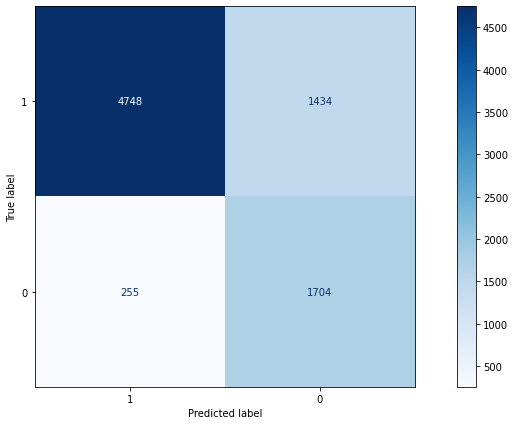

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

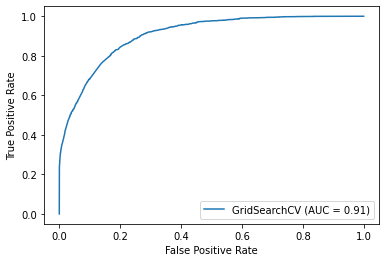

In [11]:
plot_roc_curve(gscv, X_test, y_test)